# Creates bar graphs of scoring chances by game 
Works well for visualizing a playoff series. Need to input data manually, though.

### Import

In [7]:
from pylab import *
%matplotlib inline
import matplotlib.cm as mcm

### Write game final scores
Use format: WIN SPACE WS BN LOSE SPACE LS where WIN = winning team, WS = winning score, BN = backslash lowercase n, LOSE = losing team, LS = losing score. See below.

In [8]:
#e.g. PIT 3\nSJ 2. The \n means newline--also put this at the end to add (OT) or (SO)
gamescores = ['PIT 3\nS.J 2', 'PIT 2\nS.J 1\n(OT)', 'S.J 3\nPIT 2\n(OT)', 
             'PIT 3\nS.J 1', 'S.J 4\nPIT 2', 'PIT 3\nS.J 1']

### Enter assorted graph info
Order doesn't matter. See <a href='http://matplotlib.org/examples/color/named_colors.html'>matplotlib docs</a> for more (named) color choices. Color1 should be darker and will be used for HD chances; color2, lighter, and used for low/medium danger.

Set the y-axis label. I suggest giving credit where credit is due here, if necessary.

Also set the savefilename here if you want to save.

In [83]:
graphtitle = 'PIT-SJ SCF scoring chances by game'
team1 = 'PIT'
team2 = 'S.J'
team1color1 = 'gold' 
team1color2 = 'lightyellow'
team2color1 = 'darkcyan'
team2color2 = 'cyan'

yaxislabel = 'Chances (WOI)'

savefilename = None

### Enter game-by-game data
Example (made-up) data given. Follow team1 and team2 as specified above.

In [95]:
team1_highdanger = [20, 5, 15, 8, 22, 20]
team1_total = [45, 25, 35, 17, 37, 40]
team2_highdanger = [7, 8, 11, 10, 9, 10]
team2_total = [25, 17, 33, 25, 22, 27]

team1_mediumlow = [tot-high for tot, high in zip(team1_total, team1_highdanger)]
team2_mediumlow = [tot-high for tot, high in zip(team2_total, team2_highdanger)]

### Do some calculations to scale the numbers

In [96]:
ytop = max(max(team1_total), max(team2_total))
while not ytop % 5 == 0:
    ytop += 1
ytop += 5
ylabs = arange(5, ytop, 10)

dx = 1/len(team1_total)
dy = 1/ytop

xs = arange(0, 1, dx)
xs_lab = arange(0.4*dx, 1, dx)
ys = arange(5*dy, ytop*dy, 10*dy)

team1_highdanger = [y*dy for y in team1_highdanger]
team1_mediumlow = [y*dy for y in team1_mediumlow]
team2_highdanger = [y*dy for y in team2_highdanger]
team2_mediumlow = [y*dy for y in team2_mediumlow]

barwidth = 0.4*dx

### Create graph
You'll need the humor sans font. (See <a href='http://stackoverflow.com/questions/19663986/getting-xkcd-plots-using-matplotlib'>here</a> for help.) 

To make the axis arrows bigger I use code from <a href='http://stackoverflow.com/questions/17646247/how-to-make-fuller-axis-arrows-with-matplotlib'>here</a> and scale the graph down.

To save, remove the '#' from #savefig(savefilename). You're better off taking a screenshot though since this will cut off the legend. Use show() at the end if you're not in ipython.

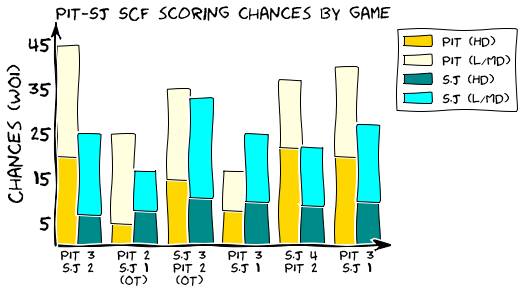

In [97]:
xkcd()
rcParams['font.size']=20
fig = gcf()
ax = gca()
xticks([]) # labels
yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)
    
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

# manual arrowhead width and length
hw = 1./20
hl = 1./20
lw = 1. # axis line width
ohg = 0.3 # arrow overhang

# compute matching arrowhead length and width
yhw = hw * height/width
yhl = hl * width/height

# draw x and y axis
ax.arrow(0, 0, 1, 0., fc='k', ec='k', lw = lw,
         head_width=hw, head_length=hl, overhang = ohg,
         length_includes_head= True, clip_on = False)

ax.arrow(0, 0, 0., 1, fc='k', ec='k', lw = lw,
         head_width=yhw, head_length=yhl, overhang = ohg,
         length_includes_head= True, clip_on = False)

clip_on = True #if only positive x or y values.

xlim(0, 1)
ylim(0, 1)

bar(xs, team1_highdanger, color=team1color1, width=barwidth, label=team1 + ' (HD)')
bar(xs, team1_mediumlow, bottom=team1_highdanger, color=team1color2, width=barwidth, 
    label=team1 + ' (L/MD)')
bar(xs_lab, team2_highdanger, color=team2color1, width=barwidth, label=team2 + ' (HD)')
bar(xs_lab, team2_mediumlow, bottom=team2_highdanger, color=team2color2, width=barwidth, 
    label=team2 + ' (L/MD)')

ylabel(yaxislabel)
xticks(xs_lab, gamescores, size=14)
yticks(ys, ylabs)
legend(loc=2, bbox_to_anchor=(1, 1), fontsize=14)
title(graphtitle, size=18)
#savefig(savefilename)